# Agents in LangChain

<figure>
<a
href="https://colab.research.google.com/github/HassanAlgoz/agentic-ai-systems/blob/main/Lessons/L01/01_agents.ipynb"><img
src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
<figcaption>Open In Colab</figcaption>
</figure>

This quickstart takes you from a simple setup to a fully functional AI
agent in just a few minutes.

## Questions

-   What is an *Agent* in LangChain and how to make one?
-   What’s the relationship between an LLM and an Agent?
-   What can agents do?
-   How do I compare and select the best model for my agent?
-   Can I run an agent locally without a provider?

## Setup Virtual Environment

``` sh
uv init
uv venv -p 3.12
```

### Activate the virtual environment

#### Windows

``` sh
.venv\Scripts\activate.bat
```

#### MacOS / Linux

``` sh
source .venv/bin/activate
```

### Install dependencies

``` sh
!pip install ipykernel
```

``` sh
!pip install langchain langchain_openai langchain_community
```

Note: **Agents** require [**a model that supports tool
calling**](https://openrouter.ai/models?fmt=cards&supported_parameters=tools).

## OpenRouter

OpenRouter is the Unified Interface For LLMs.

Key benefits include:

-   One API for all models
    -   no subscription to each provider needed
    -   switch easily between models and providers by changing a `str`
        value
-   Some models are free
-   Circumvent regional restrictions

<figure>
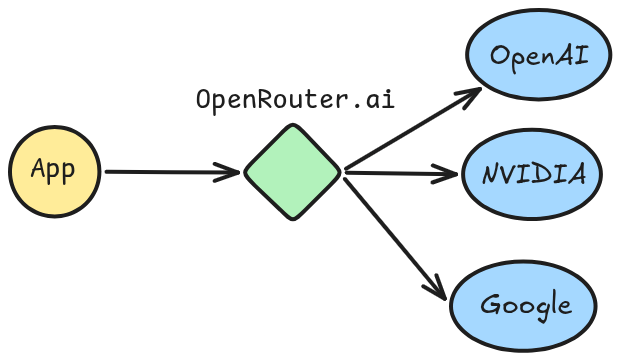
<figcaption aria-hidden="true">Open Router</figcaption>
</figure>

If you don’t already have an OpenRouter API key, you can create one for
free at: [OpenRouter](https://openrouter.ai/keys).

## What is an API Key?

Think of an **API Key** as a **hotel key card**.

-   **The Hotel (Server):** Has resources (rooms) but keeps them locked.
-   **The Guest (Client):** Wants access.
-   **The Key Card (API Key):** Identifies you and proves you are
    allowed to enter specific rooms.

------------------------------------------------------------------------

### What & Why

An API key is a unique string of characters used to identify the calling
program.

-   **Identification:** Keys “authenticate the calling project,”
    allowing the server to recognize who is asking for data.
-   **Control:** This lets the server track usage for billing and
    enforce limits (quotas) so one user doesn’t crash the system.

------------------------------------------------------------------------

### Security Risks

If you lose your key, it is like dropping your credit card.

-   **Theft:** Attackers can use your key to make requests on your
    behalf.
-   **Consequences:** You suffer **financial loss** (paying for their
    usage) or **service denial** (they use up your available quota).

> **Rule:** Never post keys on public sites like GitHub.

### How to Set Your API Key?

In Colab, add your API key via **Secrets** (key icon in the left
sidebar). Create a secret named `OPENROUTER_API_KEY` with your key as
the value, then enable notebook access to it.

If we use the OpenAI API, we’ll have to add:

``` sh
OPENAI_API_BASE="https://openrouter.ai/api/v1"
```

.. such that the model uses OpenRouter instead of the default OpenAI
API.

In [ ]:
import os
from google.colab import userdata

# We use OpenRouter for the agent — add OPENROUTER_API_KEY to Colab Secrets (key icon in left sidebar)
# Get your key at https://openrouter.ai/keys
os.environ["OPENROUTER_API_KEY"] = userdata.get("OPENROUTER_API_KEY")

## Basic usage

Models can be utilized in two ways:

1.  **With agents** - Models can be dynamically specified when creating
    an [agent](../oss/python/langchain/agents#model).
2.  **Standalone** - Models can be called directly (outside of the agent
    loop) for tasks like text generation, classification, or extraction
    without the need for an agent framework.

[Here](https://docs.langchain.com/oss/python/langchain/models) is a
useful how-to for all the things that you can do with chat models, but
we’ll show a few highlights below.

There are [a few standard
parameters](https://docs.langchain.com/oss/python/langchain/models#parameters)
that we can set with chat models. Two of the most common are:

-   `model`: the name of the model
-   `max_tokens`: limits the total number of tokens in the response,
    effectively controlling how long the output can be.
-   `temperature`: the sampling temperature
    -   **Low temperature** (close to 0) is more deterministic and
        focused outputs. This is good for tasks requiring accuracy or
        factual responses.
    -   **High temperature** (close to 1) is good for creative tasks or
        generating varied responses.

LangChain supports many models via [third-party
integrations](https://docs.langchain.com/oss/python/integrations/chat).
By default, the course will use
[ChatOpenAI](https://docs.langchain.com/oss/python/integrations/chat/openai)
because it is both popular and performant.

In [2]:
from langchain_openai import ChatOpenAI

# https://openrouter.ai/openai/gpt-5-nano
model_gpt5_nano = ChatOpenAI(
    model="openai/gpt-5-nano",
    temperature=0,
    base_url="https://openrouter.ai/api/v1",
    api_key=os.environ.get("OPENROUTER_API_KEY"),
)

# https://openrouter.ai/nvidia/nemotron-3-nano-30b-a3b:free
model_nemotron3_nano = ChatOpenAI(
    model="nvidia/nemotron-3-nano-30b-a3b:free",
    temperature=0,
    base_url="https://openrouter.ai/api/v1",
    api_key=os.environ.get("OPENROUTER_API_KEY"),
)

/home/halgoz/work/ai-agents/content/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

### Running a model locally

LangChain supports running models locally on your own hardware. This is
useful for scenarios where either data privacy is critical, you want to
invoke a custom model, or when you want to avoid the costs incurred when
using a cloud-based model.

[Ollama](https://docs.langchain.com/oss/python/integrations/chat/ollama)
is one of the easiest ways to run chat and embedding models locally.

## Key Methods

1.  `.invoke()`: results are only sent from the server when generation
    stops
2.  `.stream()`: results are sent from the server as they are being
    generated
3.  `.batch()`: send multiple inputs at once

### 1. Invoke

The most straightforward way to call a model is to use `invoke()` with a
single message or a list of messages:

In [ ]:
message = model_nemotron3_nano.invoke("what is Ramadan?")

.. this returns an `AIMessage` object:

In [6]:
message

AIMessage(content='**Ramadan** is the ninth month of the Islamic lunar calendar and is observed by Muslims worldwide as a month of fasting, prayer, reflection, and community.  \n\n### Key Features\n\n| Aspect | Description |\n|--------|-------------|\n| **Fasting (Sawm)** | From dawn (Fajr) to sunset (Maghrib) Muslims abstain from food, drink, smoking, and marital relations. The fast is intended to cultivate self‑discipline, empathy for the less fortunate, and spiritual growth. |\n| **Prayer** | Additional nightly prayers called **Tarawih** are performed at the mosque, often completing a recitation of the entire Qur’an over the course of the month. |\n| **Qur’an Recitation** | Many Muslims aim to read or listen to the entire Qur’an during Ramadan, taking advantage of the increased spiritual focus. |\n| **Charity (Zakat & Sadaqah)** | The month emphasizes giving to those in need; many people increase charitable donations and volunteer work. |\n| **Community & Iftar** | The evening meal 

.. which has a `content` property, which includes the generated response
text:

In [7]:
print(message.content)

**Ramadan** is the ninth month of the Islamic lunar calendar and is observed by Muslims worldwide as a month of fasting, prayer, reflection, and community.  

### Key Features

| Aspect | Description |
|--------|-------------|
| **Fasting (Sawm)** | From dawn (Fajr) to sunset (Maghrib) Muslims abstain from food, drink, smoking, and marital relations. The fast is intended to cultivate self‑discipline, empathy for the less fortunate, and spiritual growth. |
| **Prayer** | Additional nightly prayers called **Tarawih** are performed at the mosque, often completing a recitation of the entire Qur’an over the course of the month. |
| **Qur’an Recitation** | Many Muslims aim to read or listen to the entire Qur’an during Ramadan, taking advantage of the increased spiritual focus. |
| **Charity (Zakat & Sadaqah)** | The month emphasizes giving to those in need; many people increase charitable donations and volunteer work. |
| **Community & Iftar** | The evening meal that breaks the fast, **iftar

## Messages

**Messages** are the fundamental unit of context for models in
LangChain. They represent **the input and output of models**, carrying
both the content and metadata needed to represent the state of a
conversation when interacting with an LLM.

*Messages* are objects that contain three things:

-   **Content**: Actual model response: text, images, audio, documents,
    etc.
-   **Metadata**: Optional fields such as response information, message
    IDs, and token usage
-   **Role**: Identifies the message type. One of:
    1.  [`SystemMessage`](https://docs.langchain.com/oss/python/langchain/messages#system-message):
        Tells the model how to behave and provide context for
        interactions
    2.  [`HumanMessage`](https://docs.langchain.com/oss/python/langchain/messages#human-message):
        Represents user input and interactions with the model
    3.  [`AIMessage`](https://docs.langchain.com/oss/python/langchain/messages#ai-message):
        Responses generated by the model, including text content, tool
        calls, and metadata
    4.  [`ToolMessage`](https://docs.langchain.com/oss/python/langchain/messages#tool-message):
        Represents the outputs of [tool
        calls](https://docs.langchain.com/oss/python/langchain/models#tool-calling)

In [18]:
from langchain.messages import (
    SystemMessage,
    HumanMessage,
    AIMessage
)

In [ ]:
system_prompt = SystemMessage("You always answer with 10 concise words, no more.")
user_prompt = HumanMessage("How do I make an Agent in Python?")

messages = [
    system_prompt,
    user_prompt,
]
response = model_nemotron3_nano.invoke(messages)

In [27]:
type(message)

langchain_core.messages.ai.AIMessage

In [25]:
print(response.content)

Define class inherit from base implement act sense communicate loop

### Metadata

An `AIMessage` can hold token counts and other usage metadata in its
[`usage_metadata`](https://reference.langchain.com/python/langchain-core/messages/ai/UsageMetadata)
field:

In [28]:
response.usage_metadata

{'input_tokens': 38,
 'output_tokens': 299,
 'total_tokens': 337,
 'input_token_details': {'audio': 0, 'cache_read': 0},
 'output_token_details': {'audio': 0, 'reasoning': 276}}

### Conversation

A list of messages can be provided to a chat model to represent
conversation history. Each message has a role that models use to
indicate who sent the message in the conversation.

In [ ]:
conversation = [
    SystemMessage("You are a helpful assistant that translates English to Arabic."),
    HumanMessage("Translate: I love programming."),
    AIMessage("أحب البرمجة."),
    HumanMessage("I love building applications.")
]

message = model_nemotron3_nano.invoke(conversation)

In [23]:
print(message.content)

أحب بناء التطبيقات.

### 2. Streaming and chunks

Most models can stream their output content while it is being generated.
By displaying output progressively, streaming significantly improves
user experience, particularly for longer responses.

Calling `stream()` returns an iterator that yields output
[`AIMessageChunk`](https://reference.langchain.com/python/langchain-core/messages/ai/AIMessageChunk)
objects as they are produced. You can use a loop to process each chunk
in real-time.

In [31]:
chunks = []
for chunk in model_nemotron3_nano.stream("what is Ramadan? keep it short, keep it simple."):
    chunks.append(chunk)
    print(chunk.text, end="", flush=True)

Ramadan is the ninth month of the Islamic lunar calendar. During it, Muslims fast from sunrise to sunset—no food, drink, or other physical needs—while also increasing prayer, charity, and reflection. The month ends with the celebration of Eid al‑Fitr.content='' additional_kwargs={} response_metadata={'model_provider': 'openai'} id='lc_run--019c8ac4-24a9-7243-b435-06c1fabbe92f' tool_calls=[] invalid_tool_calls=[] tool_call_chunks=[]

In [38]:
for ch in chunks[50:60]:
    print(ch.content)

 of
 the
 Islamic
 lunar
 calendar
.
 During
 it
,
 Muslims

### 3. Batch

Batching a collection of independent requests to a model can
significantly improve performance and reduce costs, as the processing
can be done in parallel:

In [15]:
responses = model_nemotron3_nano.batch([
    "What is the capital of Saudi Arabia?",
    "What is 2 + 8",
    "Is the sky blue or is it our perception? give a short and concise answer"
])

for response in responses:
    print(response)

content='The capital of Saudi Arabia is **Riyadh**.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 24, 'total_tokens': 62, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': 0, 'reasoning_tokens': 26, 'rejected_prediction_tokens': None}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}, 'cost': 0, 'is_byok': False, 'cost_details': {'upstream_inference_cost': 0, 'upstream_inference_prompt_cost': 0, 'upstream_inference_completions_cost': 0}}, 'model_provider': 'openai', 'model_name': 'nvidia/nemotron-3-nano-30b-a3b:free', 'system_fingerprint': None, 'id': 'gen-1771587230-rws1sKd4yd2Ir45jBE92', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--019c7ad3-dab8-7670-aebf-be1a19d73902-0' tool_calls=[] invalid_tool_calls=[] usage_metadata={'input_tokens': 24, 'output_tokens': 38, 'total_tokens': 62, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {

In [16]:
for i, response in enumerate(responses):
    print(response.content)
    print("="*100)

The capital of Saudi Arabia is **Riyadh**.
2 + 8 = 10.
The sky appears blue because molecules in the atmosphere scatter short‑wavelength (blue) sunlight—an objective physical effect that our visual system interprets as the color blue.

## Structured output

Models can be requested to provide their response in a format matching a
given schema. This is useful for ensuring the output can be easily
parsed and used in subsequent processing. LangChain supports multiple
schema types and methods for enforcing structured output.

[Pydantic
models](https://docs.pydantic.dev/latest/concepts/models/#basic-model-usage)
provide the richest feature set with field validation, descriptions, and
nested structures.

In [8]:
from pydantic import BaseModel, Field

class Movie(BaseModel):
    """A movie with details."""
    title: str = Field(..., description="The title of the movie")
    year: int = Field(..., description="The year the movie was released")
    director: str = Field(..., description="The director of the movie")
    rating: float = Field(..., description="The movie's rating out of 10")

In [ ]:
model_with_structure = model_nemotron3_nano.with_structured_output(Movie)
response = model_with_structure.invoke(
    "Provide details about the movie Inception"
)

In [19]:
print("Title:", response.title)
print("Year:", response.year)
print("Director:", response.director)
print("Rating:", response.rating)

Title: Inception
Year: 2010
Director: Christopher Nolan
Rating: 8.8

Another example: **Refining Search Query**

In [ ]:
# Schema for structured output
from pydantic import BaseModel, Field


class SearchQuery(BaseModel):
    search_query: str = Field(None, description="Query that is optimized web search.")
    justification: str = Field(
        None, description="Why this query is relevant to the user's request."
    )

# Augment the LLM with schema for structured output
structured_llm = model_nemotron3_nano.with_structured_output(SearchQuery)

In [ ]:
# Invoke the augmented LLM
output = structured_llm.invoke(
    "How does Calcium CT score relate to high cholesterol?"
)

In [13]:
print("search_query:", output.search_query)
print("justification:", output.justification)

search_query: Calcium CT score relationship with high cholesterol atherosclerosis risk
justification: The user wants to understand how a coronary artery calcium (CAC) score derived from CT imaging connects to elevated blood cholesterol levels. This requires information on the pathophysiology of atherosclerotic plaque formation, the role of lipid disorders, and how CAC scoring is used clinically to assess cardiovascular risk in the context of cholesterol.

### Benefits of Structured Output

Models are trained specifically to structure their outputs, because
benefits where paramount:

-   **Cost**: the model doesn’t generate extra text.
-   **Accuracy**: you get only what you want; no more, no less.
-   **Programming**: structre can be parsed and used in programs.
    Example: tool calling.

## LLMs and augmentations

Workflows and agentic systems are based on LLMs and the various
augmentations you add to them. [Tool
calling](https://docs.langchain.com/oss/python/langchain/tools),
[structured
outputs](https://docs.langchain.com/oss/python/langchain/structured-output),
and [short term
memory](https://docs.langchain.com/oss/python/langchain/short-term-memory)
are a few options for tailoring LLMs to your needs.

<img src="https://mintcdn.com/langchain-5e9cc07a/-_xGPoyjhyiDWTPJ/oss/images/augmented_llm.png?fit=max&auto=format&n=-_xGPoyjhyiDWTPJ&q=85&s=7ea9656f46649b3ebac19e8309ae9006" alt="LLM augmentations" data-path="oss/images/augmented_llm.png" data-optimize="true" data-opv="3" srcset="https://mintcdn.com/langchain-5e9cc07a/-_xGPoyjhyiDWTPJ/oss/images/augmented_llm.png?w=280&fit=max&auto=format&n=-_xGPoyjhyiDWTPJ&q=85&s=53613048c1b8bd3241bd27900a872ead 280w, https://mintcdn.com/langchain-5e9cc07a/-_xGPoyjhyiDWTPJ/oss/images/augmented_llm.png?w=560&fit=max&auto=format&n=-_xGPoyjhyiDWTPJ&q=85&s=7ba1f4427fd847bd410541ae38d66d40 560w, https://mintcdn.com/langchain-5e9cc07a/-_xGPoyjhyiDWTPJ/oss/images/augmented_llm.png?w=840&fit=max&auto=format&n=-_xGPoyjhyiDWTPJ&q=85&s=503822cf29a28500deb56f463b4244e4 840w, https://mintcdn.com/langchain-5e9cc07a/-_xGPoyjhyiDWTPJ/oss/images/augmented_llm.png?w=1100&fit=max&auto=format&n=-_xGPoyjhyiDWTPJ&q=85&s=279e0440278d3a26b73c72695636272e 1100w, https://mintcdn.com/langchain-5e9cc07a/-_xGPoyjhyiDWTPJ/oss/images/augmented_llm.png?w=1650&fit=max&auto=format&n=-_xGPoyjhyiDWTPJ&q=85&s=d936838b98bc9dce25168e2b2cfd23d0 1650w, https://mintcdn.com/langchain-5e9cc07a/-_xGPoyjhyiDWTPJ/oss/images/augmented_llm.png?w=2500&fit=max&auto=format&n=-_xGPoyjhyiDWTPJ&q=85&s=fa2115f972bc1152b5e03ae590600fa3 2500w" />

## Tool calling

Models can request to call tools that perform tasks such as fetching
data from a database, searching the web, or running code. Tools are
pairings of:

1.  A schema, including the name of the tool, a description, and/or
    argument definitions (often a JSON schema)
2.  A function or coroutine to execute.

Note: A *coroutine* is a method that can suspend execution and resume at
a later time

In [79]:
from langchain.tools import tool

# Define a tool
@tool
def multiply(a: int, b: int) -> int:
    """Multiplies two numbers."""
    return a * b

In [80]:
# Bind tools to the model
llm_with_tools = model_nemotron3_nano.bind_tools([multiply])
system_prompt = "You are a helpful assistant that can use tools to perform calculations."

Step 1: Model generates tool calls

In [81]:
question = "What is 2 times 3?"
messages = [
    SystemMessage(system_prompt),
    HumanMessage(question),
]

In [82]:
ai_msg = llm_with_tools.invoke(messages)

In [83]:
type(ai_msg)

langchain_core.messages.ai.AIMessage

In [84]:
# Get the tool call
ai_msg.tool_calls

[{'name': 'multiply',
  'args': {'a': 2, 'b': 3},
  'id': 'call_f60c3d347ce746c29de453f5',
  'type': 'tool_call'}]

Step 2: Execute tools and collect results

In [85]:
for tool_call in ai_msg.tool_calls:
    # Execute the tool with the generated arguments
    tool_msg = multiply.invoke(tool_call)
    messages.append(tool_msg)

In [86]:
type(tool_msg)

langchain_core.messages.tool.ToolMessage

In [87]:
messages

[SystemMessage(content='You are a helpful assistant that can use tools to perform calculations.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='What is 2 times 3?', additional_kwargs={}, response_metadata={}),
 ToolMessage(content='6', name='multiply', tool_call_id='call_f60c3d347ce746c29de453f5')]

Step 3: Pass results back to model for final response

In [90]:
final_response = model_nemotron3_nano.invoke(messages)

In [92]:
print(final_response.text)

The result of 2 times 3 is **6**. 

This is a basic multiplication fact:  
$ 2 \times 3 = 6 $.  

Let me know if you'd like further clarification! 😊

We’ll say how this multi-step code instructcion is wrapped inside a
`create_agent` function in langchain.

### Internet Search Tool

[**Tavily**](https://www.tavily.com/) is a search engine optimized for
LLMs and RAG, aimed at efficient, quick, and persistent search results.
As mentioned, it’s easy to sign up and offers a generous free tier.

``` sh
!pip install tavily-python
```

#### Set up Tavily API for web search (Free)

-   Tavily Search API is a search engine optimized for LLMs and RAG,
    aimed at efficient, quick, and persistent search results.

-   You can sign up for an API key [here](https://tavily.com/). It’s
    easy to sign up and offers a very generous free tier. Some lessons
    (in Module 4) will use Tavily.

-   Add `TAVILY_API_KEY` to Colab Secrets (key icon in the left
    sidebar).

In [97]:
from google.colab import userdata
from tavily import TavilyClient

tavily_client = TavilyClient(api_key=userdata.get("TAVILY_API_KEY"))

In [99]:
from typing import Literal


def internet_search(
    query: str,
    max_results: int = 5,
    topic: Literal["general", "news", "finance"] = "general",
    include_raw_content: bool = False,
):
    """Run a web search"""
    return tavily_client.search(
        query,
        max_results=max_results,
        include_raw_content=include_raw_content,
        topic=topic,
    )

In [100]:
result = internet_search("What is LangGraph?", max_results=3)
result

{'query': 'What is LangGraph?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.ibm.com/think/topics/langgraph',
   'title': 'What is LangGraph? - IBM',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. **Nodes**: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making by model

## Create an Agent

Agents combine language models with tools to create systems that can
reason about tasks, decide which tools to use, and iteratively work
towards solutions.

An LLM Agent runs tools in a loop to achieve a goal. An agent runs until
a stop condition is met - i.e., when the model emits a final output or
an iteration limit is reached.

<figure>
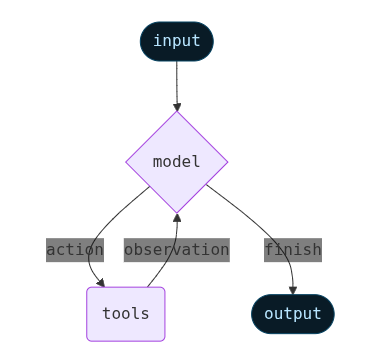
<figcaption aria-hidden="true">Agent Loop</figcaption>
</figure>

`create_agent` provides a production-ready agent implementation.

In [121]:
from langchain.agents import create_agent

# System prompt to steer the agent to be an expert researcher
AGENT_PROMPT = """You are an expert researcher. Your job is to conduct thorough research and then write a polished report.

You have access to an internet search tool as your primary means of gathering information.

Keep it short and concise.

## `internet_search`

Use this to run an internet search for a given query. You can specify the max number of results to return, the topic, and whether raw content should be included.
"""

agent = create_agent(
    model=model_nemotron3_nano,
    tools=[internet_search],
    system_prompt=AGENT_PROMPT
)

### Invoke the agent

In [122]:
result = agent.invoke({
    "messages": [
        HumanMessage("Explain agentic AI in a tweet")
    ]
})

In [123]:
result

{'messages': [HumanMessage(content='Explain agentic AI in a tweet', additional_kwargs={}, response_metadata={}, id='eb3b86d8-3111-4646-bd11-7f2b3d24e2cb'),
  AIMessage(content='Agentic AI refers to AI systems that can autonomously set goals, plan, and act to achieve them without constant human input—think of AI agents that decide, adapt, and execute tasks like a digital personal assistant on steroids.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 916, 'prompt_tokens': 456, 'total_tokens': 1372, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': 0, 'reasoning_tokens': 651, 'rejected_prediction_tokens': None}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}, 'cost': 0, 'is_byok': False, 'cost_details': {'upstream_inference_cost': 0, 'upstream_inference_prompt_cost': 0, 'upstream_inference_completions_cost': 0}}, 'model_provider': 'openai', 'model_name': 'nvidia/nemotron-3-nano-30b-a3b:free', 

In [124]:
# Print the agent's response
print(result["messages"][-1].content)

Agentic AI refers to AI systems that can autonomously set goals, plan, and act to achieve them without constant human input—think of AI agents that decide, adapt, and execute tasks like a digital personal assistant on steroids.

Let’s ask about something that needs search:

In [125]:
result = agent.invoke({
    "messages": [
        HumanMessage("What is the difference between LangChain, LangGraph and LangSmith?")
    ]
})

In [128]:
result

{'messages': [HumanMessage(content='What is the difference between LangChain, LangGraph and LangSmith?', additional_kwargs={}, response_metadata={}, id='7f8c9005-eb8e-4072-86e0-64dd26bec6a6'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 123, 'prompt_tokens': 462, 'total_tokens': 585, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': 0, 'reasoning_tokens': 66, 'rejected_prediction_tokens': None}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}, 'cost': 0, 'is_byok': False, 'cost_details': {'upstream_inference_cost': 0, 'upstream_inference_prompt_cost': 0, 'upstream_inference_completions_cost': 0}}, 'model_provider': 'openai', 'model_name': 'nvidia/nemotron-3-nano-30b-a3b:free', 'system_fingerprint': None, 'id': 'gen-1771856086-8OPWhAITZng1xT0GmOTD', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c8ada-45c5-7e13-8c63-b2bdba91d977-0', tool_calls=[{'na

In [126]:
type(result["messages"][-2])

langchain_core.messages.tool.ToolMessage

In [127]:
# Print the agent's response
print(result["messages"][-1].content)

**LangChain vs LangGraph vs LangSmith – What They Do and When to Use Them**

| Aspect | **LangChain** | **LangGraph** | **LangSmith** |
|--------|---------------|---------------|---------------|
| **Primary Goal** | Provide a **modular toolbox** for building LLM‑powered apps (prompts, models, memory, tools, RAG, etc.). | Add **stateful, graph‑based orchestration** for complex, multi‑step workflows that need branching, loops, retries, and shared state. | Offer **observability, tracing, evaluation, and monitoring** for any LLM application (especially those built with LangChain/LangGraph). |
| **Core Concept** | **Chains** – linear pipelines of components (`prompt → model → parser`). | **Graphs** – nodes (steps/agents) and edges (control flow) that can loop, branch, and retain a mutable state. | **Traces** – full execution logs that let you drill from a workflow run down to a single LLM call, plus evaluation & metrics. |
| **Typical Use‑Cases** | • Simple chatbots, Q&A, RAG pipelines<br>•

## Key Takeaways

-   Three key methods for models: invoke, stream, and batch.
-   LLMs can be configured to responsd in a structured format
-   Agent = Model + Tools
-   Models (LLMs) are the brain-power of agents
-   Tools connect the LLM to the outside world.

## Activity

**Over to you**: The previous model returned one search result. Can you
make an Agent that uses the content from the top-3 ranking sites, to
answer the question?